In [1]:
import pandas as pd

file_path1 = "Unemployment_in_India.csv"
file_path2 = "Unemployment_Rate_upto_11_2020.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Display the first few rows of both datasets
df1_head = df1.head()
df2_head = df2.head()

# Display the column information for both datasets
df1_info = df1.info()
df2_info = df2.info()

df1_head, df2_head, df1_info, df2_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

(           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                                     43.24  Rural  
 1           11755881.0                                     42.05  Rural  
 2           12086707.0                                     43.50  Rural  
 3           12285693.0                                     43.97  Rural  
 4           12256762.0                                     44.68  Rural  ,
            Region         Date  Frequency   Estimated Unemployment

In [2]:
# Clean and prepare datasets before merging

# Strip column names to remove leading/trailing spaces for consistency
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert the 'Date' columns to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y', errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y', errors='coerce')

# Drop duplicates and irrelevant columns
df1_cleaned = df1.dropna().drop_duplicates()
df2_cleaned = df2.drop(['Region.1'], axis=1).dropna().drop_duplicates()

# Merge the datasets based on 'Region', 'Date', and 'Frequency'
merged_df = pd.merge(df1_cleaned, df2_cleaned, on=['Region', 'Date', 'Frequency'], suffixes=('_df1', '_df2'))

# Check for any missing values after the merge and basic summary
missing_values = merged_df.isnull().sum()
merged_summary = merged_df.describe()

# Display the first few rows to ensure successful merging
merged_df_head = merged_df.head()

missing_values, merged_summary, merged_df_head


(Estimated Unemployment Rate (%)_df1            0.0
 Estimated Employed_df1                         0.0
 Estimated Labour Participation Rate (%)_df1    0.0
 Area                                           0.0
 Region                                         0.0
 Date                                           0.0
 Frequency                                      0.0
 Estimated Unemployment Rate (%)_df2            0.0
 Estimated Employed_df2                         0.0
 Estimated Labour Participation Rate (%)_df2    0.0
 longitude                                      0.0
 latitude                                       0.0
 dtype: float64,
        Estimated Unemployment Rate (%)_df1  Estimated Employed_df1  \
 count                                  0.0                     0.0   
 mean                                   NaN                     NaN   
 std                                    NaN                     NaN   
 min                                    NaN                     NaN   
 25%

In [3]:
# Check unique values for key columns in both datasets before merging
unique_values_df1 = {
    "Region": df1_cleaned["Region"].unique(),
    "Frequency": df1_cleaned["Frequency"].unique()
}

unique_values_df2 = {
    "Region": df2_cleaned["Region"].unique(),
    "Frequency": df2_cleaned["Frequency"].unique()
}

unique_values_df1, unique_values_df2


({'Region': array([], dtype=object), 'Frequency': array([], dtype=object)},
 {'Region': array([], dtype=object), 'Frequency': array([], dtype=object)})

In [4]:
# Reload the datasets without any cleaning to inspect their initial contents
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Display initial sample and basic information from both datasets
df1_sample = df1.head(10)
df2_sample = df2.head(10)

df1_info_initial = df1.info()
df2_info_initial = df2.info()

df1_sample, df2_sample, df1_info_initial, df2_info_initial


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

(           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 5  Andhra Pradesh   31-10-2019    Monthly                              3.52   
 6  Andhra Pradesh   30-11-2019    Monthly                              4.12   
 7  Andhra Pradesh   31-12-2019    Monthly                              4.38   
 8  Andhra Pradesh   31-01-2020    Monthly                              4.84   
 9  Andhra Pradesh   29-02-2020    Monthly                              5.91   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                    

In [5]:
# Rename columns to remove leading and trailing spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Standardize frequency values to ensure consistency
df1['Frequency'] = df1['Frequency'].str.strip().replace({'Monthly': 'M'})
df2['Frequency'] = df2['Frequency'].str.strip()

# Merge the datasets based on 'Region', 'Date', and 'Frequency' after cleaning
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Drop unnecessary columns from df2 before merging
df2_cleaned = df2.drop(['Region.1'], axis=1)

# Perform the merge
merged_df = pd.merge(df1, df2_cleaned, on=['Region', 'Date', 'Frequency'], suffixes=('_df1', '_df2'))

# Show the first few rows to check the results
merged_df.head(), merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Region                                       306 non-null    object        
 1   Date                                         306 non-null    datetime64[ns]
 2   Frequency                                    306 non-null    object        
 3   Estimated Unemployment Rate (%)_df1          306 non-null    float64       
 4   Estimated Employed_df1                       306 non-null    float64       
 5   Estimated Labour Participation Rate (%)_df1  306 non-null    float64       
 6   Area                                         306 non-null    object        
 7   Estimated Unemployment Rate (%)_df2          306 non-null    float64       
 8   Estimated Employed_df2                       306 non-null    int64         
 9  

(           Region       Date Frequency  Estimated Unemployment Rate (%)_df1  \
 0  Andhra Pradesh 2020-01-31         M                                 4.84   
 1  Andhra Pradesh 2020-01-31         M                                 7.11   
 2  Andhra Pradesh 2020-02-29         M                                 5.91   
 3  Andhra Pradesh 2020-02-29         M                                 5.66   
 4  Andhra Pradesh 2020-03-31         M                                 4.06   
 
    Estimated Employed_df1  Estimated Labour Participation Rate (%)_df1   Area  \
 0              12016676.0                                        43.46  Rural   
 1               4618860.0                                        35.91  Urban   
 2              11723617.0                                        42.83  Rural   
 3               4822035.0                                        36.84  Urban   
 4              11359660.0                                        40.66  Rural   
 
    Estimated Unemployme

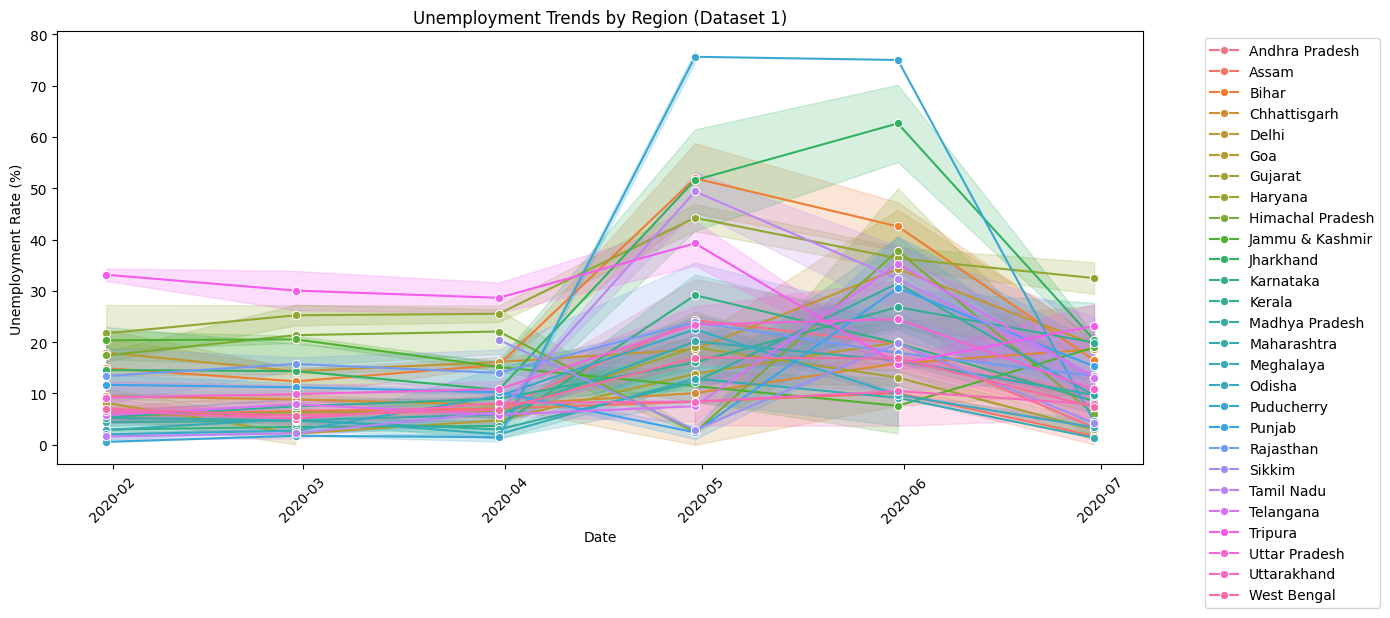

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Line plot for unemployment trends over time by region
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df, x='Date', y='Estimated Unemployment Rate (%)_df1', hue='Region', marker='o')
plt.title("Unemployment Trends by Region (Dataset 1)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

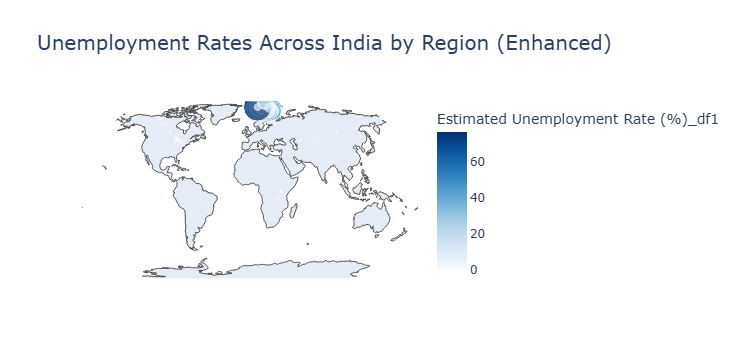

In [9]:
import plotly.express as px

# Improved scatter_geo plot for better visualization
fig = px.scatter_geo(
    merged_df,
    lat='latitude',
    lon='longitude',
    color='Estimated Unemployment Rate (%)_df1',
    size='Estimated Unemployment Rate (%)_df1',
    hover_name='Region',
    projection="natural earth",
    title='Unemployment Rates Across India by Region (Enhanced)',
    color_continuous_scale='Blues',
    size_max=20,
)

# Fine-tune layout for better display
fig.update_layout(
    title_font_size=20,
    legend_title_text='Unemployment Rate (%)',
    geo=dict(showframe=False, showcoastlines=True),
)

fig.show()


C:\Users\tarul\AppData\Local\Temp\ipykernel_24012\497270394.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\tarul\AppData\Local\Temp\ipykernel_24012\497270394.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




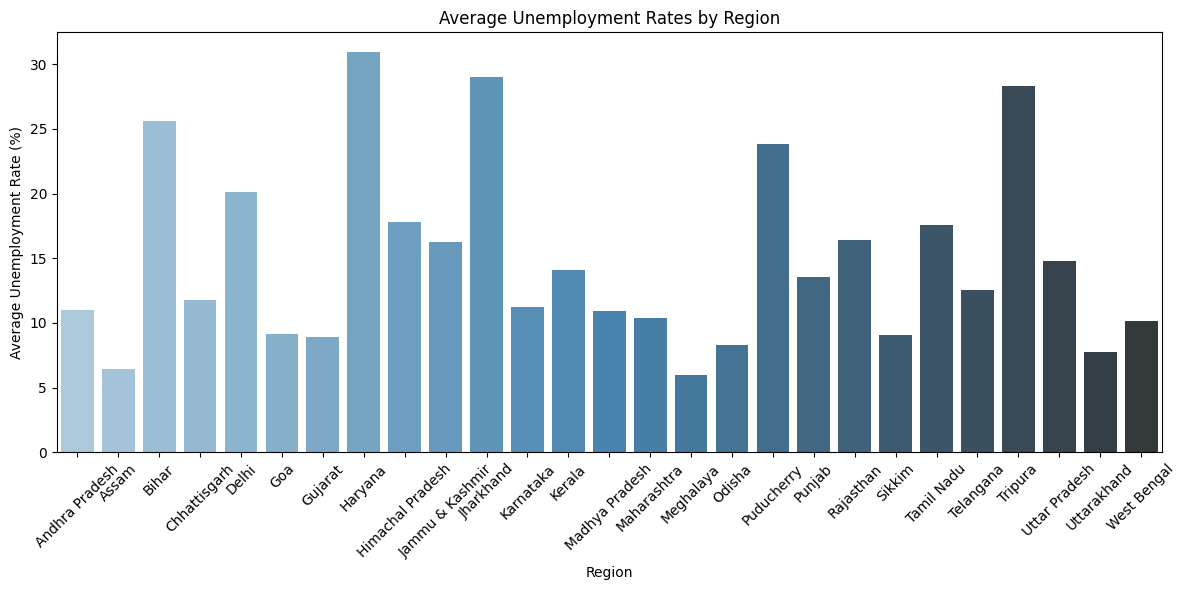

In [10]:
# 1. Bar Plot: Average unemployment rates by region
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='Region', y='Estimated Unemployment Rate (%)_df1', ci=None, palette='Blues_d')
plt.title('Average Unemployment Rates by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.tight_layout()
plt.show()

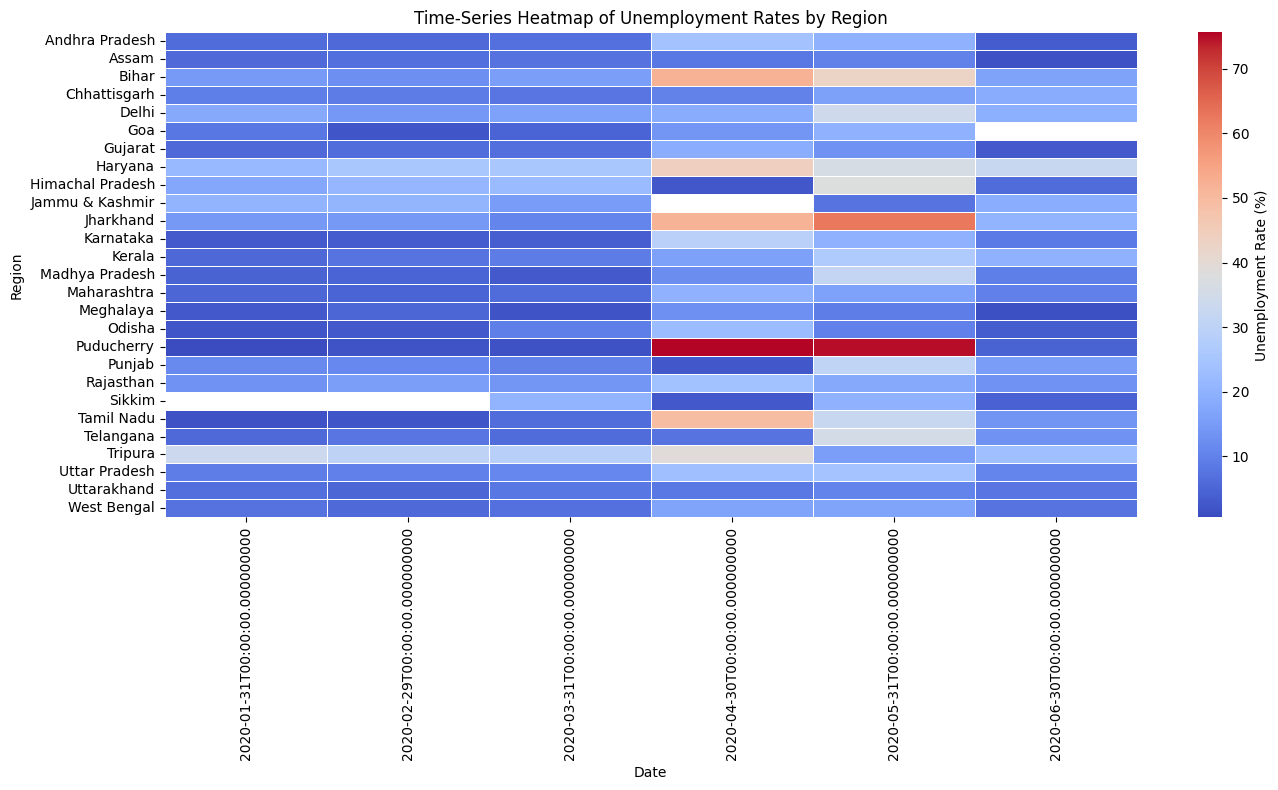

In [11]:
# 2. Time-Series Heatmap: Region-wise unemployment rates over time
heatmap_data = merged_df.pivot_table(values='Estimated Unemployment Rate (%)_df1', index='Region', columns='Date')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Unemployment Rate (%)'}, linewidths=0.5)
plt.title('Time-Series Heatmap of Unemployment Rates by Region')
plt.tight_layout()
plt.show()

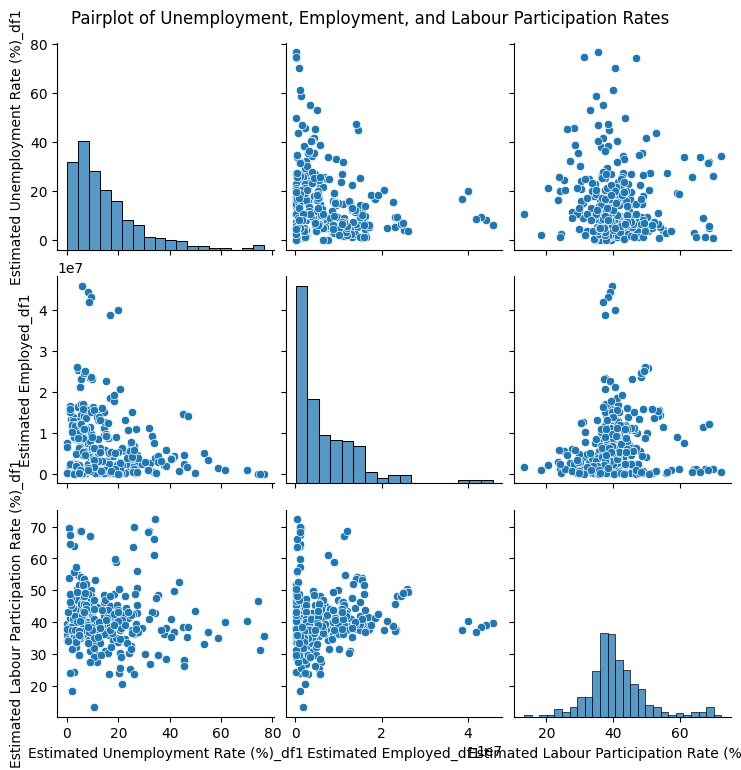

In [12]:
# Generate the pairplot with corrected column names
sns.pairplot(merged_df[[
    'Estimated Unemployment Rate (%)_df1',
    'Estimated Employed_df1',
    'Estimated Labour Participation Rate (%)_df1'
]])
plt.suptitle('Pairplot of Unemployment, Employment, and Labour Participation Rates', y=1.02)
plt.show()